In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from  io import StringIO
import matplotlib.image as mpimg
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from fbprophet import Prophet
from neuralprophet import NeuralProphet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
import pickle

# Machine learning

import tensorflow as tf
import pydotplus
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('D:\\Data Science\\Heart-Attack-Analysis\\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [15]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

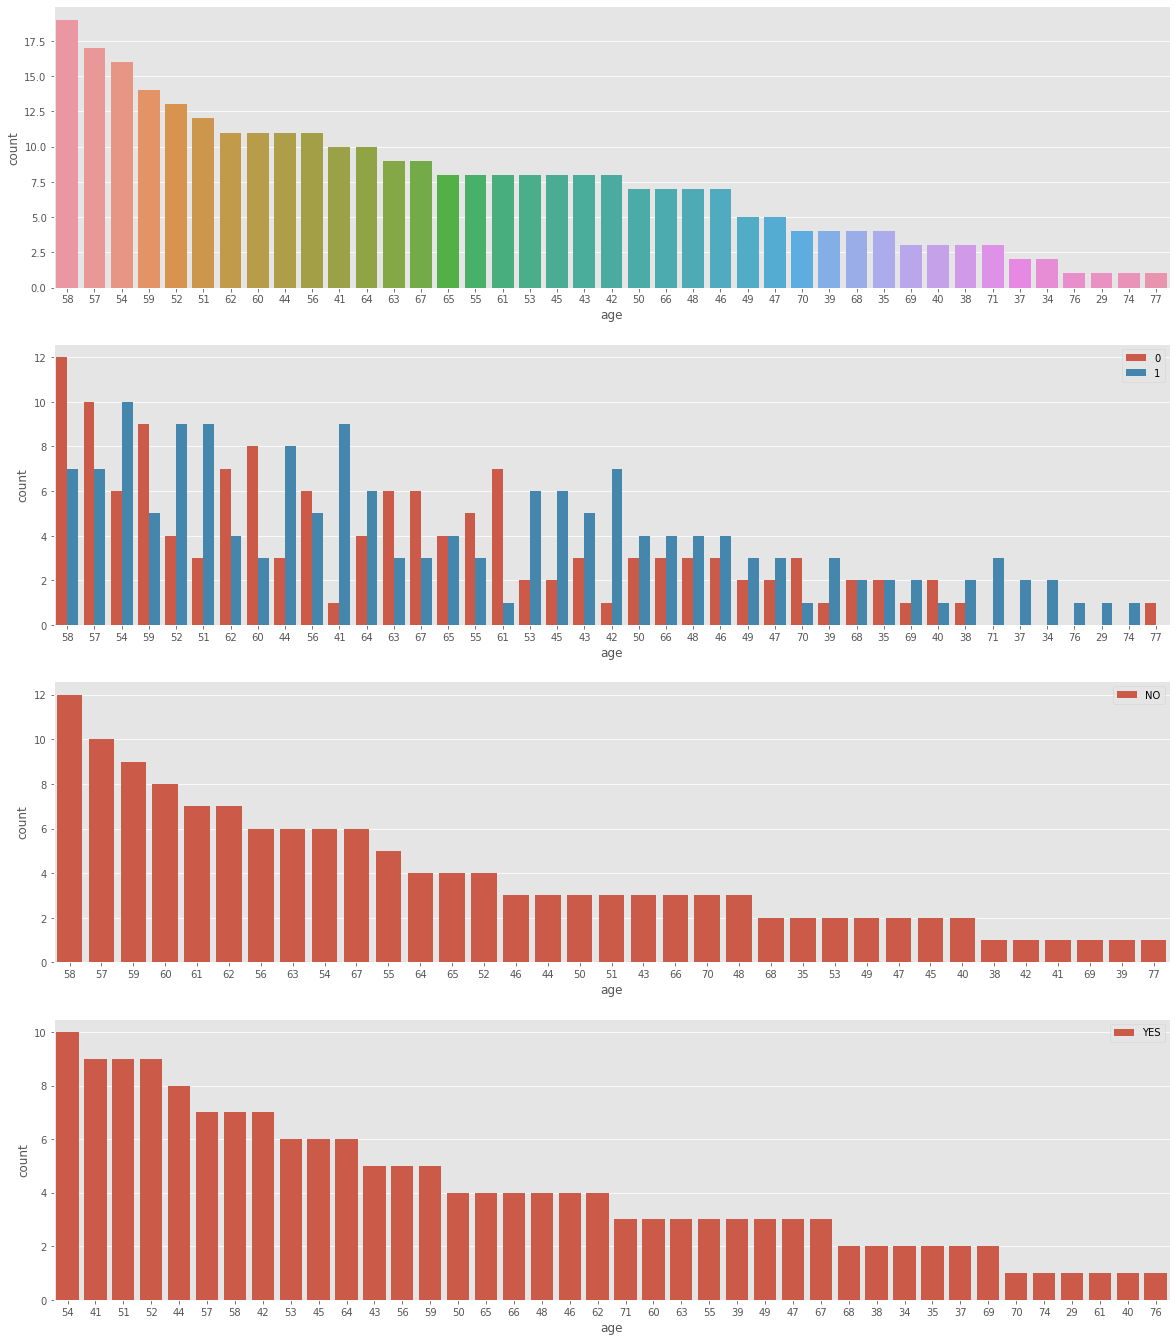

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(20,30))

plt.subplot(5,2,(1,2))
sns.countplot(x=df.age,order=df.age.value_counts().index)

plt.subplot(5,2,(3,4))
sns.countplot(x=df.age,hue=df.output,order=df.age.value_counts().index)
plt.legend(loc='upper right')

plt.subplot(5,2,(5,6))
h=df[(df.age>0) & (df.output==0)]
sns.countplot(x=h.age,hue=h.output,order=h.age.value_counts().index)
plt.legend(['NO'],loc='upper right')

plt.subplot(5,2,(7,8))
h=df[(df.age>0) & (df.output==1)]
sns.countplot(x=h.age,hue=h.output,order=h.age.value_counts().index)
plt.legend(['YES'],loc='upper right')

plt.show()

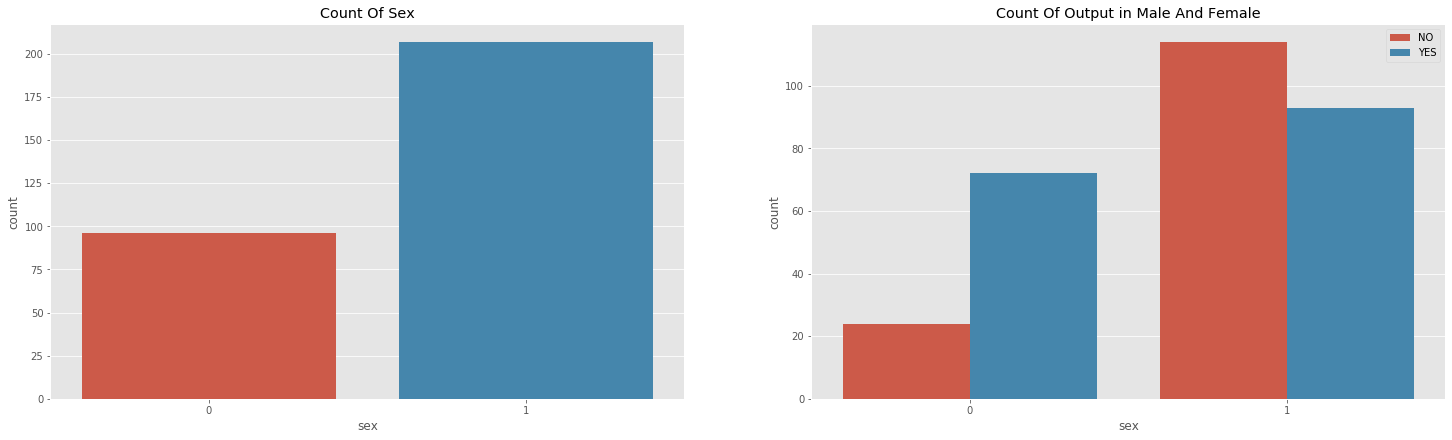

In [128]:
plt.figure(figsize=(25,40))

plt.subplot(5,2,1)
sns.countplot(df.sex)
plt.title('Count Of Sex')

plt.subplot(5,2,2)
sns.countplot(df.sex,hue=df.output)
plt.legend(['NO','YES'])
plt.title('Count Of Output in Male And Female')

plt.show()

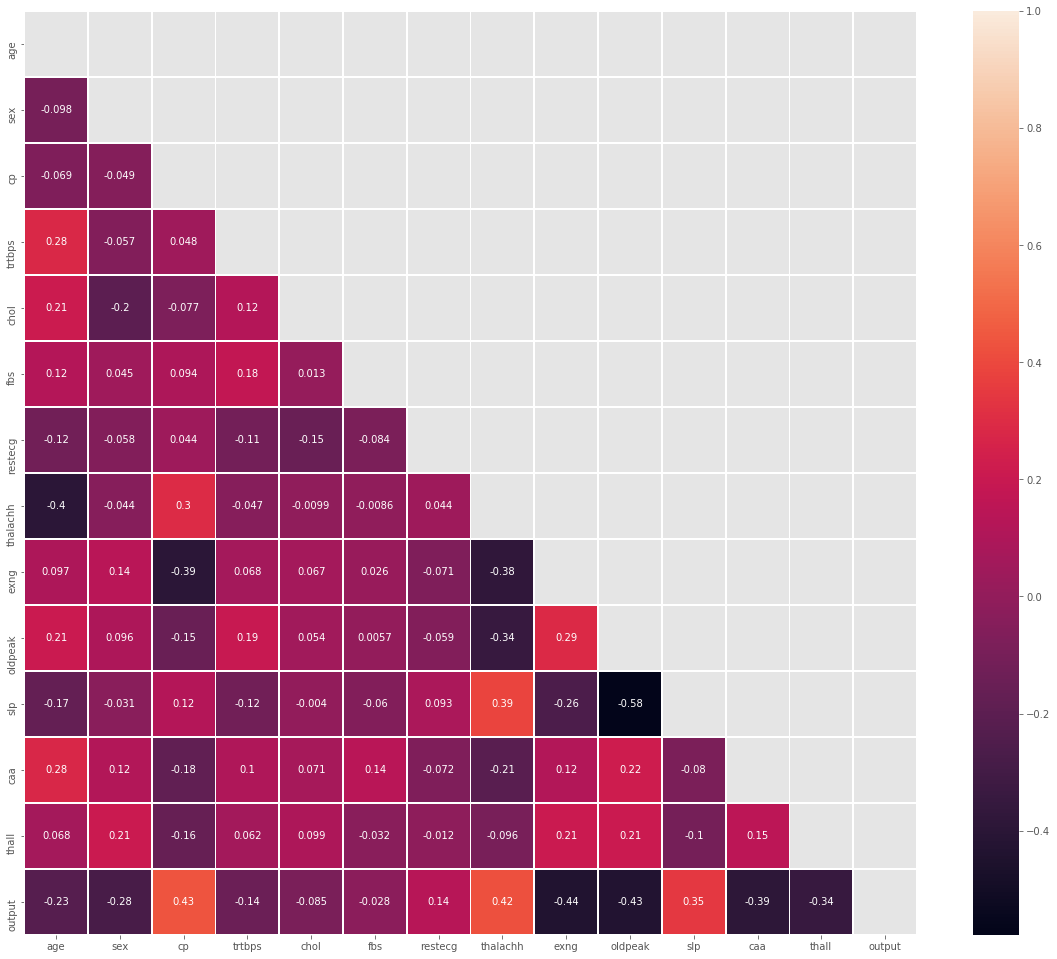

In [130]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

In [131]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

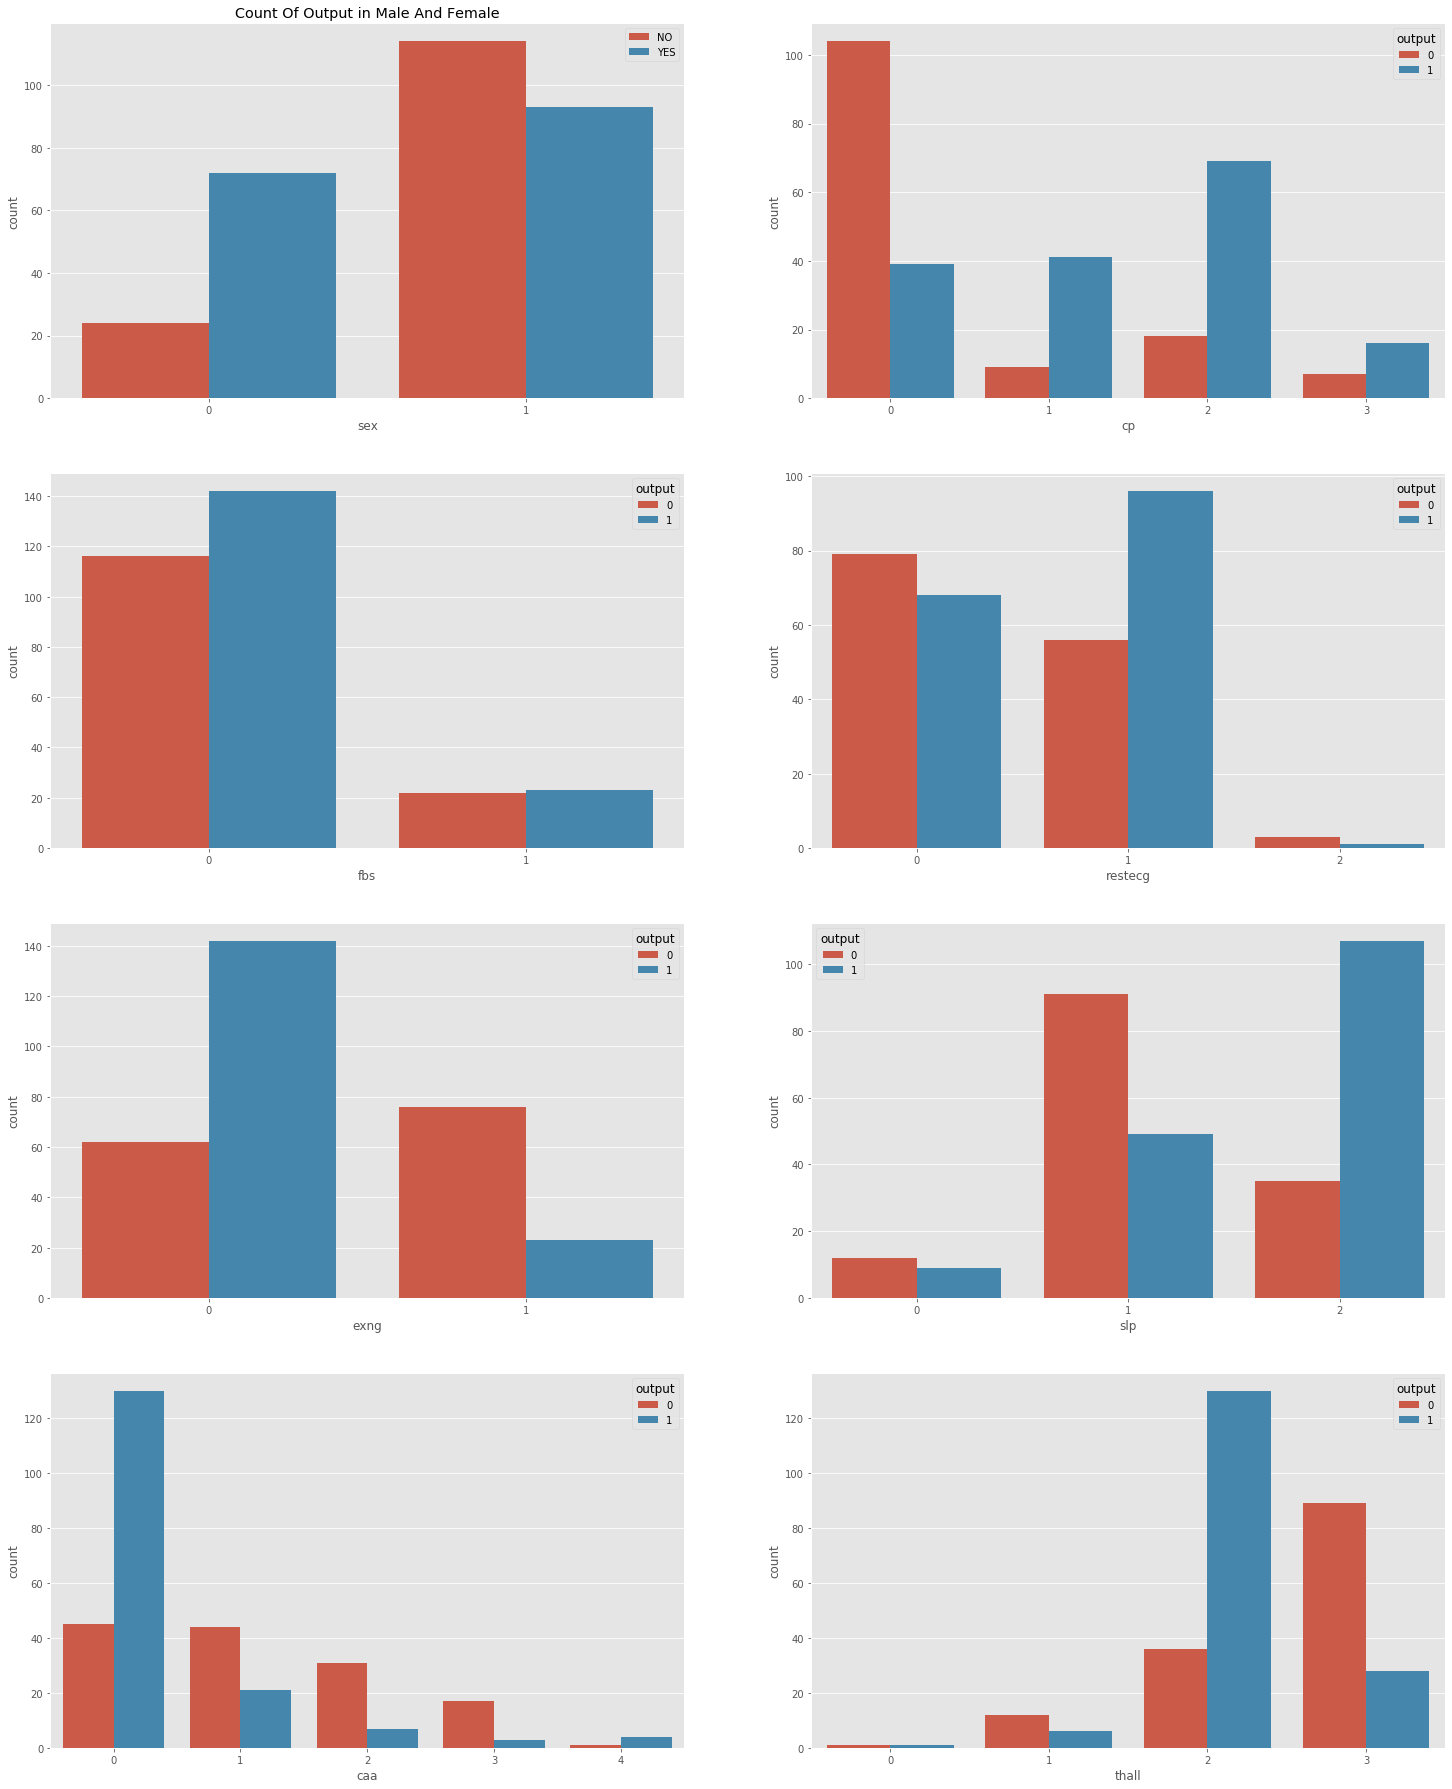

In [136]:
plt.figure(figsize=(25,40))

plt.subplot(5,2,1)
sns.countplot(df.sex,hue=df.output)
plt.legend(['NO','YES'])
plt.title('Count Of Output in Male And Female')

plt.subplot(5,2,2)
sns.countplot(df.cp,hue=df.output)

plt.subplot(5,2,3)
sns.countplot(df.fbs,hue=df.output)

plt.subplot(5,2,4)
sns.countplot(df.restecg,hue=df.output)

plt.subplot(5,2,5)
sns.countplot(df.exng,hue=df.output)

plt.subplot(5,2,6)
sns.countplot(df.slp,hue=df.output)

plt.subplot(5,2,7)
sns.countplot(df.caa,hue=df.output)

plt.subplot(5,2,8)
sns.countplot(df.thall,hue=df.output)

plt.show()

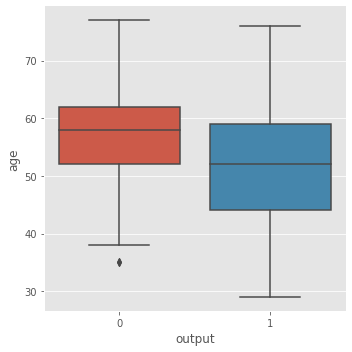

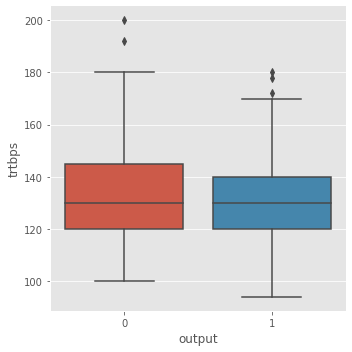

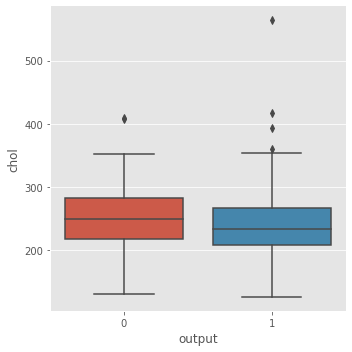

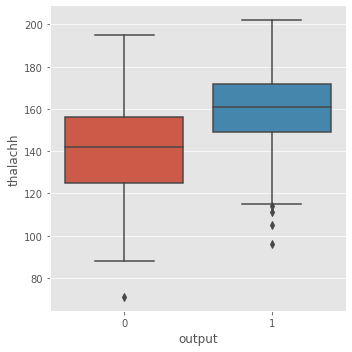

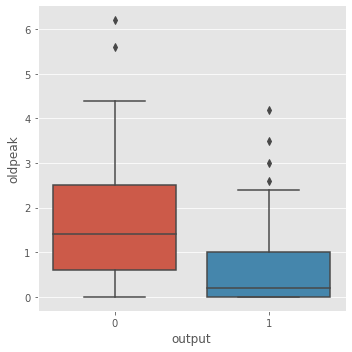

In [138]:
sns.catplot(x="output", y="age", data=df, kind="box")
sns.catplot(x="output", y="trtbps", data=df, kind="box")
sns.catplot(x="output", y="chol", data=df, kind="box")
sns.catplot(x="output", y="thalachh", data=df, kind="box")
sns.catplot(x="output", y="oldpeak", data=df, kind="box");

In [139]:
chest_pain_count = df["cp"].value_counts().reset_index()
chest_pain_count

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


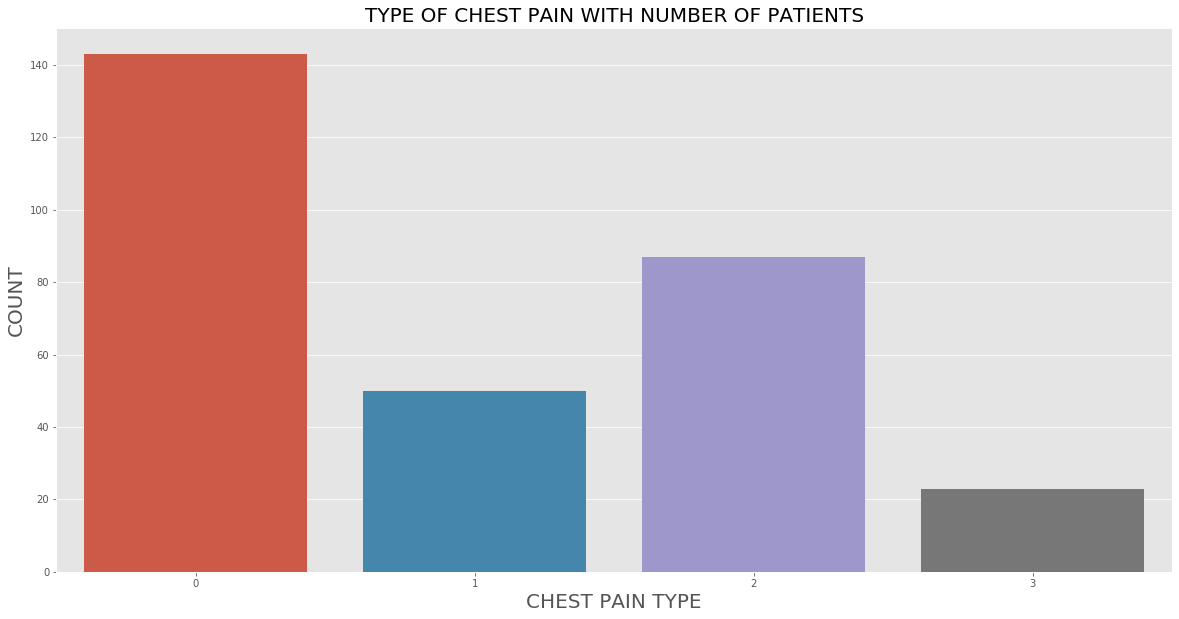

In [140]:
plt.figure(figsize=(20, 10))
plt.style.use("ggplot")
sns.barplot(x=chest_pain_count["index"], y=chest_pain_count["cp"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS", fontsize=20)
plt.xlabel("CHEST PAIN TYPE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

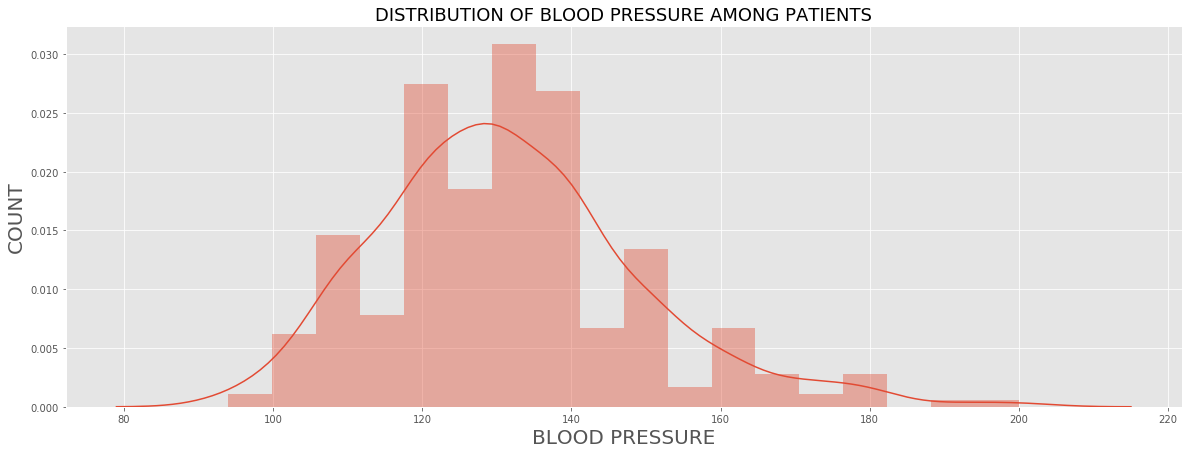

In [149]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 7))
sns.distplot(df["trtbps"])
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

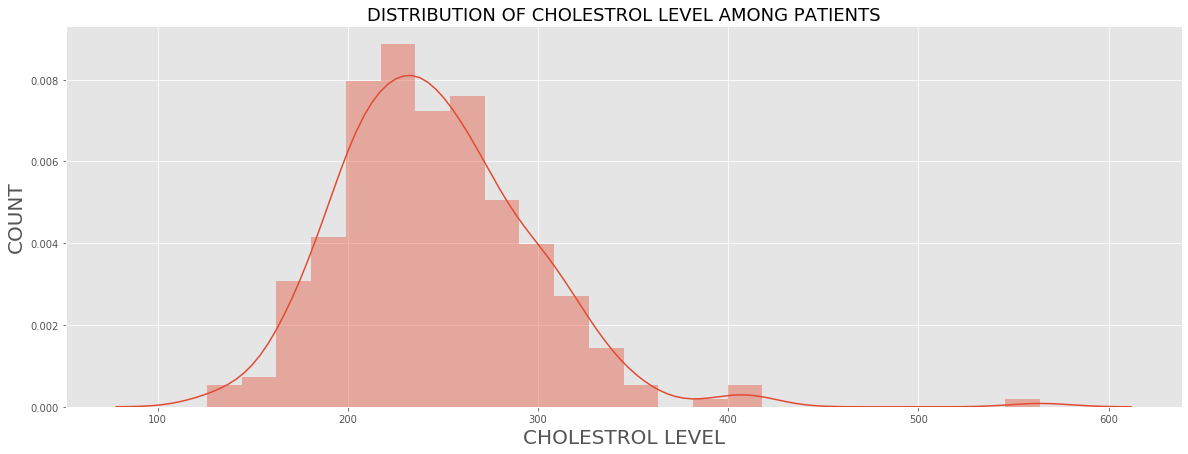

In [151]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 7))
sns.distplot(df["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS", fontsize=18)
plt.xlabel("CHOLESTROL LEVEL", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

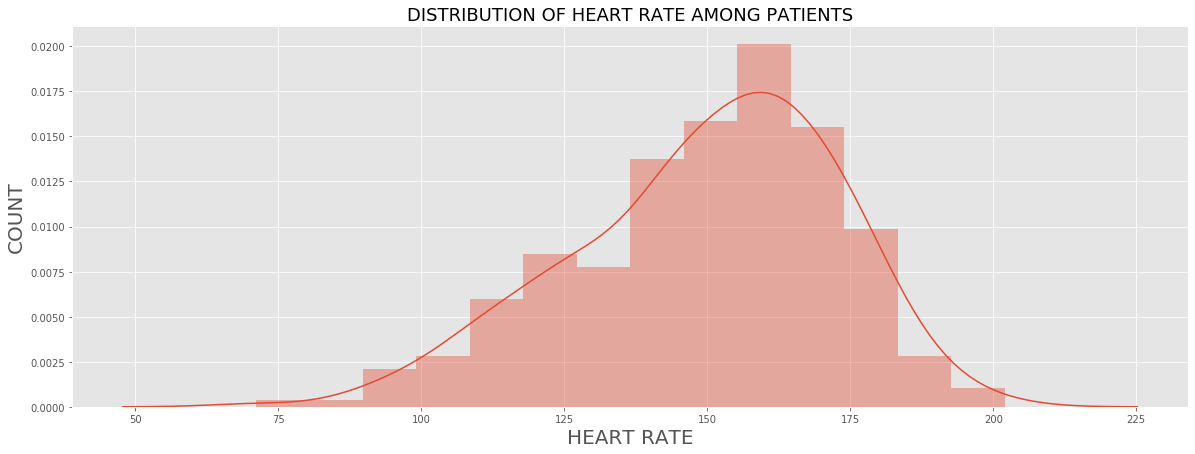

In [152]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 7))
sns.distplot(df["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS", fontsize=18)
plt.xlabel("HEART RATE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

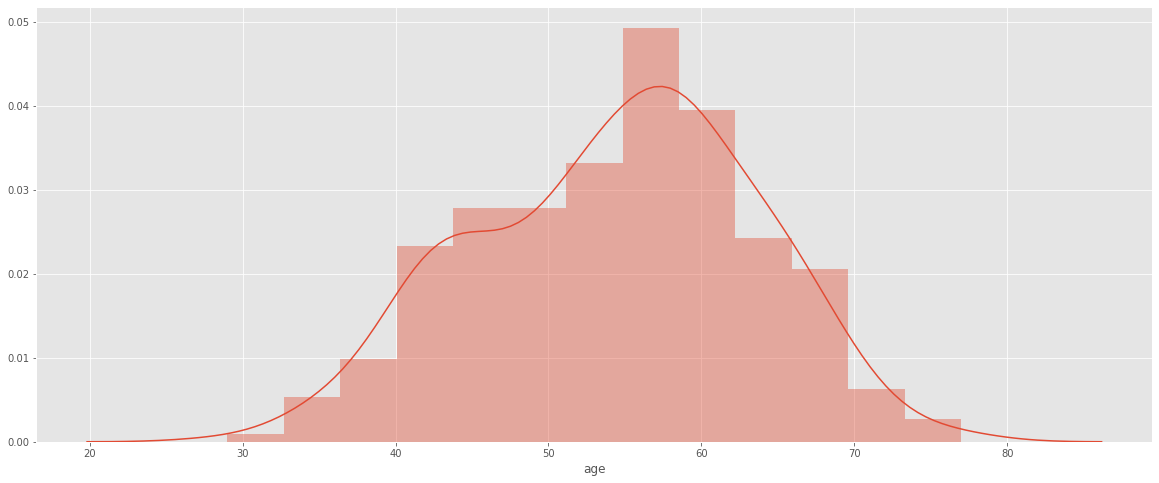

In [204]:
plt.figure(figsize=(20, 8))
plt.style.use("ggplot")

plt.subplot(1,2,(1,2))
sns.distplot(df.age)

plt.show()

In [165]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [167]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [169]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [170]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)

    elif predictor == 'knn':
        print('TrainingK-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)

    elif predictor == 'dt':
        print('Training LDecision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)

    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)

    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)

    classifier.fit(X_train, y_train)

    print('''Predicting Single Cell Result''')
    single_predict = classifier.predict(sc.transform([[
        63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1
    ]]))
    if single_predict > 0.5:
        print("Heart Attack\n")
    else:
        print("No Heart Attack \n")

    print('''Prediciting Test Set Result''')
    y_pred = classifier.predict(X_test)
    result = np.concatenate((y_pred.reshape(len(y_pred), 1),
                             y_test.reshape(len(y_test), 1)), 1)
    print(result, '\n')
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n')
    print('True Positives :', cm[0][0])
    print('False Positives :', cm[0][1])
    print('False Negatives :', cm[1][0])
    print('True Negatives :', cm[0][1], '\n')

    print('''Classification Report''')
    print(classification_report(y_test, y_pred,
          target_names=['M', 'B'], zero_division=1))

    print('''Evaluating Model Performance''')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, '\n')

    print('''Applying K-Fold Cross validation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(
        estimator=classifier, X=X_train, y=y_train, cv=10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100), '\n')

In [171]:
predictor('lr', {'penalty': 'l1', 'solver': 'liblinear'})

Training Logistic Regression on Training Set
Predicting Single Cell Result
Heart Attack

Prediciting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[21  8]
 [ 4 28]] 

True Positives : 21
False Positives : 8
False Negatives : 4
True Negatives : 8 

Classification Report
              precision    recall  f1-score   support

           M       0.84      0.72      0.78        29
           B       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80

In [172]:
predictor('svm', {'C': .5, 'gamma': 0.8,
          'kernel': 'linear', 'random_state': 0})

Training Support Vector Machine on Training Set
Predicting Single Cell Result
Heart Attack

Prediciting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[22  7]
 [ 3 29]] 

True Positives : 22
False Positives : 7
False Negatives : 3
True Negatives : 7 

Classification Report
              precision    recall  f1-score   support

           M       0.88      0.76      0.81        29
           B       0.81      0.91      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0

In [173]:
predictor('svm', {'C': .25, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0})

Training Support Vector Machine on Training Set
Predicting Single Cell Result
Heart Attack

Prediciting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[21  8]
 [ 4 28]] 

True Positives : 21
False Positives : 8
False Negatives : 4
True Negatives : 8 

Classification Report
              precision    recall  f1-score   support

           M       0.84      0.72      0.78        29
           B       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0

In [174]:
predictor('knn', {'algorithm': 'auto', 'n_jobs': 1,
          'n_neighbors': 6, 'weights': 'uniform'})

TrainingK-Nearest Neighbours on Training Set
Predicting Single Cell Result
Heart Attack

Prediciting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[24  5]
 [ 6 26]] 

True Positives : 24
False Positives : 5
False Negatives : 6
True Negatives : 5 

Classification Report
              precision    recall  f1-score   support

           M       0.80      0.83      0.81        29
           B       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82

In [175]:
predictor('dt', {'criterion': 'entropy', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

Training LDecision Tree Classifier on Training Set
Predicting Single Cell Result
No Heart Attack 

Prediciting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]] 

Making Confusion Matrix
[[18 11]
 [ 8 24]] 

True Positives : 18
False Positives : 11
False Negatives : 8
True Negatives : 11 

Classification Report
              precision    recall  f1-score   support

           M       0.69      0.62      0.65        29
           B       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.

In [176]:
predictor('nb', {})

Training Naive Bayes Classifier on Training Set
Predicting Single Cell Result
No Heart Attack 

Prediciting Test Set Result
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[22  7]
 [ 4 28]] 

True Positives : 22
False Positives : 7
False Negatives : 4
True Negatives : 7 

Classification Report
              precision    recall  f1-score   support

           M       0.85      0.76      0.80        29
           B       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82   

In [177]:
predictor('rfc', {'criterion': 'gini',
          'max_features': 'log2', 'n_estimators': 500,'random_state': 0})

Training Random Forest Classifier on Training Set
Predicting Single Cell Result
Heart Attack

Prediciting Test Set Result
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[21  8]
 [ 4 28]] 

True Positives : 21
False Positives : 8
False Negatives : 4
True Negatives : 8 

Classification Report
              precision    recall  f1-score   support

           M       0.84      0.72      0.78        29
           B       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81     

In [178]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False) with an accuracy of  85.07


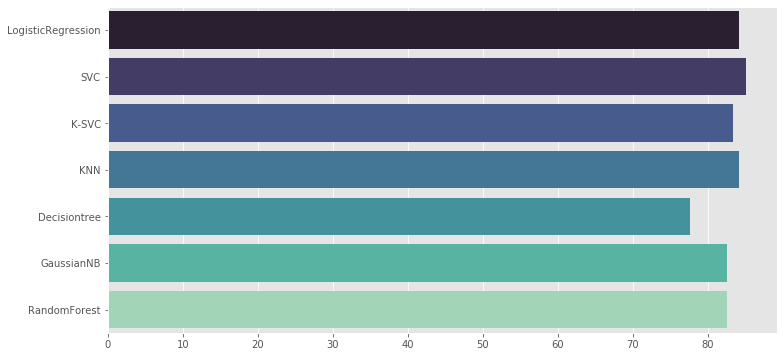

In [180]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = ['LogisticRegression', 'SVC',
               'K-SVC', 'KNN', 'Decisiontree', 'GaussianNB', 'RandomForest']
sns.barplot(x=model_accuracies, y=model_names, palette='mako')
plt.show()